### DT Model Implementation with Data2

In [ ]:
import pandas as cloudEmail_pns
import warnings as cloudEmail_wns
cloudEmail_wns.filterwarnings('ignore')
import matplotlib.pyplot as cloudEmail_mpt
from wordcloud import WordCloud as cloudEmail_wrdcld
import regex as cloudEmail_rex
import nltk as cloudEmail_ntk
cloudEmail_ntk.download('stopwords')
from nltk.corpus import stopwords as cloudEmail_swrd
phishWord = cloudEmail_swrd.words('english')

ModuleNotFoundError: No module named 'nltk'

In [3]:
cloudEmail2 = cloudEmail_pns.read_csv('Research_data2.csv')
cloudEmail2

,body,label
0,buck troubles caused small dimension soon beco...,1
1,upgrade sex pleasures techniques brightmade com,1
2,daily top cnn com top videos stories aug pm ed...,1
3,would anyone object removing list tld basicall...,0
4,welcomefastshippingcustomersupport http iwfna ...,1
...,...,...
39149,cnn alerts custom alert alert name custom aler...,1
39150,cnn alerts custom alert alert name custom aler...,1
39151,hello great work slide show viewer application...,0
39152,mail sender coming intuit com servers subject ...,0


In [4]:
from sklearn.decomposition import PCA as cloudEmail_phishPCA
from sklearn.feature_extraction.text import TfidfVectorizer as cloudEmail_TFVNumerical

cloudEmail2.dropna(subset=['body'], inplace=True)
cloudEmail_X2 = cloudEmail2['body']
cloudEmail_y2 = cloudEmail2['label']

cloudTFMod = cloudEmail_TFVNumerical(analyzer='word', ngram_range=(1, 1))
cloudEmail_X2 = cloudTFMod.fit_transform(cloudEmail_X2)
print("Research Data2 Numerical Dimensions are : ", cloudEmail_X2.shape)

cloudPCA = cloudEmail_phishPCA(n_components = 30)
cloudEmail_X2 = cloudPCA.fit_transform(cloudEmail_X2)
print("Research Data2 Dimension Reduction Shape: ", cloudEmail_X2.shape)



Research Data2 Numerical Dimensions are :  (39154, 128273)
Research Data2 Dimension Reduction Shape:  (39154, 30)


In [ ]:
import joblib as cloudEmail_phishLib

cloudEmail_phishLib.dump(cloudTFMod, "TfidfVectorizer_Model2.h5")
print("TfidfVectorizer model saved as TfidfVectorizer_Model2.h5")

loaded_TFIDF = joblib.load("TfidfVectorizer_Model2.h5")

In [5]:
from sklearn.model_selection import train_test_split as cloudEmail_phishSp
cloudEmail_X2tr, cloudEmail_X2ts, cloudEmail_y2tr, cloudEmail_y2ts = cloudEmail_phishSp(cloudEmail_X2, cloudEmail_y2, test_size=0.4, random_state=32)

In [6]:
print("60% Train Data1",cloudEmail_X2tr.shape)
print("40% Test Data1",cloudEmail_X2ts.shape)

60% Train Data1 (23492, 30)
40% Test Data1 (15662, 30)


In [7]:
from sklearn.model_selection import RandomizedSearchCV as cloudEmail_RDSCV
from sklearn.metrics import ConfusionMatrixDisplay as cloudEmail_phishDisp
from sklearn.metrics import confusion_matrix as cloudEmail_phishMatx
from sklearn.metrics import classification_report as cloudEmail_phishReport
from sklearn import metrics as cloudEmail_phishMetr
import time as cloudEmail_phishTime

In [8]:
from sklearn.tree import DecisionTreeClassifier as cloudEmail_phishDecisionTr
cloudParameters = {'criterion':['gini','entropy','log_loss'],'splitter': ['best','random'],'max_depth': [3,4,7,8]
                }
cloud_EmailMod = cloudEmail_phishDecisionTr(random_state=32)
cloud_EmailMod = cloudEmail_RDSCV(cloud_EmailMod, cloudParameters, cv=2)
cloud_EmailMod.fit(cloudEmail_X2tr[:800], cloudEmail_y2tr[:800])
print("\nRandomized Search Parameters for Decision Tree:\n",cloud_EmailMod.best_params_)


Randomized Search Parameters for Decision Tree:
 {'splitter': 'best', 'max_depth': 7, 'criterion': 'log_loss'}


In [9]:
##------ Training
Email_STime = cloudEmail_phishTime.time()
cloud_EmailMod = cloudEmail_phishDecisionTr(**cloud_EmailMod.best_params_)
cloud_EmailMod.fit(cloudEmail_X2tr, cloudEmail_y2tr)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Train Research Data2 : ", Email_ENTime - Email_STime)

Time to Train Research Data2 :  0.8499748706817627


Time to Test Research Data2 :  0.0031213760375976562
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6916
           1       0.98      0.97      0.97      8746

    accuracy                           0.97     15662
   macro avg       0.97      0.97      0.97     15662
weighted avg       0.97      0.97      0.97     15662



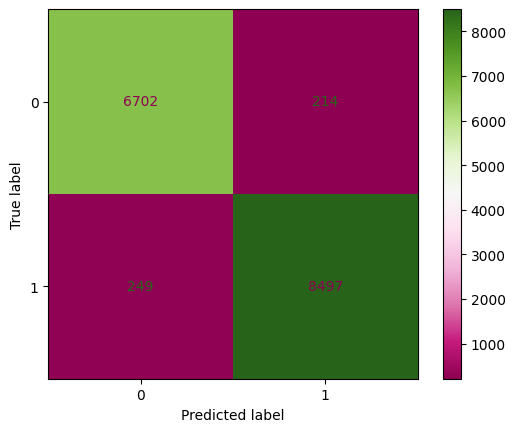

In [10]:
##------ Testing
Email_STime = cloudEmail_phishTime.time()
cloudEmail_yp = cloud_EmailMod.predict(cloudEmail_X2ts)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Test Research Data2 : ", Email_ENTime - Email_STime)

print(cloudEmail_phishReport(cloudEmail_y2ts, cloudEmail_yp))
cloudMx = cloudEmail_phishMatx(cloudEmail_y2ts, cloudEmail_yp)
cloudEmail_phishDisp(confusion_matrix = cloudMx, display_labels = [0,1]).plot(cmap='PiYG')
cloudEmail_mpt.show()

In [13]:
import joblib as cloudEmail_phishLib
cloudEmail_phishLib.dump(cloud_EmailMod, "Email_DTModel2.h5")
cloud_EmailMod

DecisionTreeClassifier(criterion='log_loss', max_depth=7)